## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [ ]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [46]:
# I hope the last steps were fairly straightforward.
# First, we import pandas and then we can call read_csv(), where we can provide some additional arguments,
# like the names for our columns.

# Setting the header row to 0 allows us to substitute our own column names.

df = pd.read_csv('QueryResults.csv', names=['DATE','TAG','POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [47]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [48]:
df.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [49]:
# To check the dimensions of the DataFrame, we use our old friend .shape. This tells us we have 1991 rows and 3 columns.

df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [50]:
# To count the number of entries in each column we can use .count().
# Note that .count() will actually tell us the number of non-NaN values in each column.

df.count(axis='columns')

0       3
1       3
2       3
3       3
4       3
       ..
1986    3
1987    3
1988    3
1989    3
1990    3
Length: 1991, dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [54]:
'''
In order to look at the number of entries and the number of posts by programming language, we need to make use of the .groupby() method.
The key is combining .groupby() with the TAG column, which holds as our categories (the names of the programming languages).

If we .sum() the number of posts then we can see how many posts each programming language had since the creation of Stack Overflow.
'''

df.groupby('TAG').sum()

<ipython-input-54-79d3a6ec3334>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('TAG').sum()


,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [55]:
# If we .count() the entries in each column, we can see how many months of entries exist per programming language.

df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [56]:
# Let's take a closer look at the 'DATE' column in our DataFrame.
# We can use the double square bracket notation to look at the second entry in the column:

df['DATE'][1]

'2008-08-01 00:00:00'

In [58]:
# Alternatively, for column names no spaces, we can also use the dot-notation:

df.DATE[1]

'2008-08-01 00:00:00'

In [60]:
# Inspecting the Data Type

# When we type check the contents of this cell,
# we see that we are not dealing with a date object, but rather with a string.

type(df["DATE"][0])

str

In [61]:
'''
This is not very handy. Not only will the string format always show the unnecessary 00:00:00,
but we also don't get the benefit of working with Datetime objects, which know how to handle dates and times.
Pandas can help us convert the string to a timestamp using the to_datetime() method.
'''

df["DATE"] = pd.to_datetime(df["DATE"])
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



In [63]:
'''
Sometimes you want to convert your DataFrame so that each category has its own column.
For example, suppose you needed to take the table below and create a separate column for each actor,
where each row is the Age of the actor:

The easiest way to accomplish this is by using the .pivot() method in Pandas. Try the example for yourself.
The thing to understand is how to supply the correct aguments to get the desired outcome.
The index are the categories for the rows. The columns are the categories for the columns.
And the values are what you want in the new cells.
'''

reshaped_data = df.pivot(index="DATE", columns="TAG", values="POSTS")
reshaped_data.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [ ]:
reshaped_data.shape

(145, 14)

In [ ]:
reshaped_data.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TagName')

In [ ]:
len(reshaped_data)

145

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [ ]:
reshaped_data.head()

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
m,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [ ]:
reshaped_data.count()

TagName
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [66]:
# In this case, we don't want to drop the rows that have a NaN value.
# Instead, we want to substitute the number 0 for each NaN value in the DataFrame.
# We can do this with the .fillna() method.

# The inplace argument means that we are updating reshaped_df.
# Without this argument we would have to write something like this:
# reshaped_df = reshaped_df.fillna(0)

reshaped_data.fillna(0, inplace=True)

In [67]:
reshaped_data.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [68]:
# We can also check if there are any NaN values left in the entire DataFrame with this line:

# Here we are using the .isna() method that we've used before,
# but we're chaining two more things: the values attribute and the any() method.
# This means we don't have to search through the entire DataFrame to spot if .isna() is True.

reshaped_data.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [69]:
# First, we have to import Matplotlib.

import matplotlib.pyplot as plt

In [ ]:
reshaped_data.head()

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
m,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


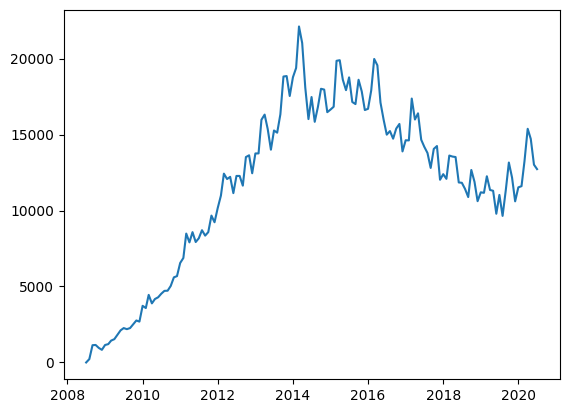

In [70]:
# All you need to do is supply the values for the horizontal axis (the x-values) and the vertical axis (the y-values) for the chart.
# The x-values are our dates and the y-values are the number of posts.
# We can supply these values to the .plot() function by position like so:

plt.plot(reshaped_data.index, reshaped_data.java)

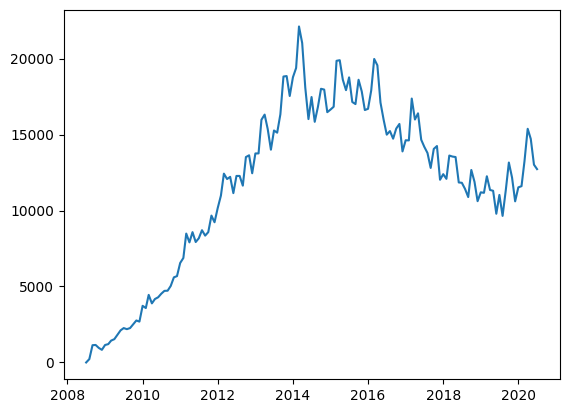

In [71]:
# or like so if you prefer the square bracket notation.

plt.plot(reshaped_data.index, reshaped_data['java'])

In [72]:
'''
Styling the Chart

Let's look at a couple of methods that will help us style our chart:

.figure() - allows us to resize our chart

.xticks() - configures our x-axis

.yticks() - configures our y-axis

.xlabel() - add text to the x-axis

.ylabel() - add text to the y-axis

.ylim() - allows us to set a lower and upper bound
'''

" \nStyling the Chart\n\nLet's look at a couple of methods that will help us style our chart:\n\n.figure() - allows us to resize our chart\n\n.xticks() - configures our x-axis\n\n.yticks() - configures our y-axis\n\n.xlabel() - add text to the x-axis\n\n.ylabel() - add text to the y-axis\n\n.ylim() - allows us to set a lower and upper bound\n"

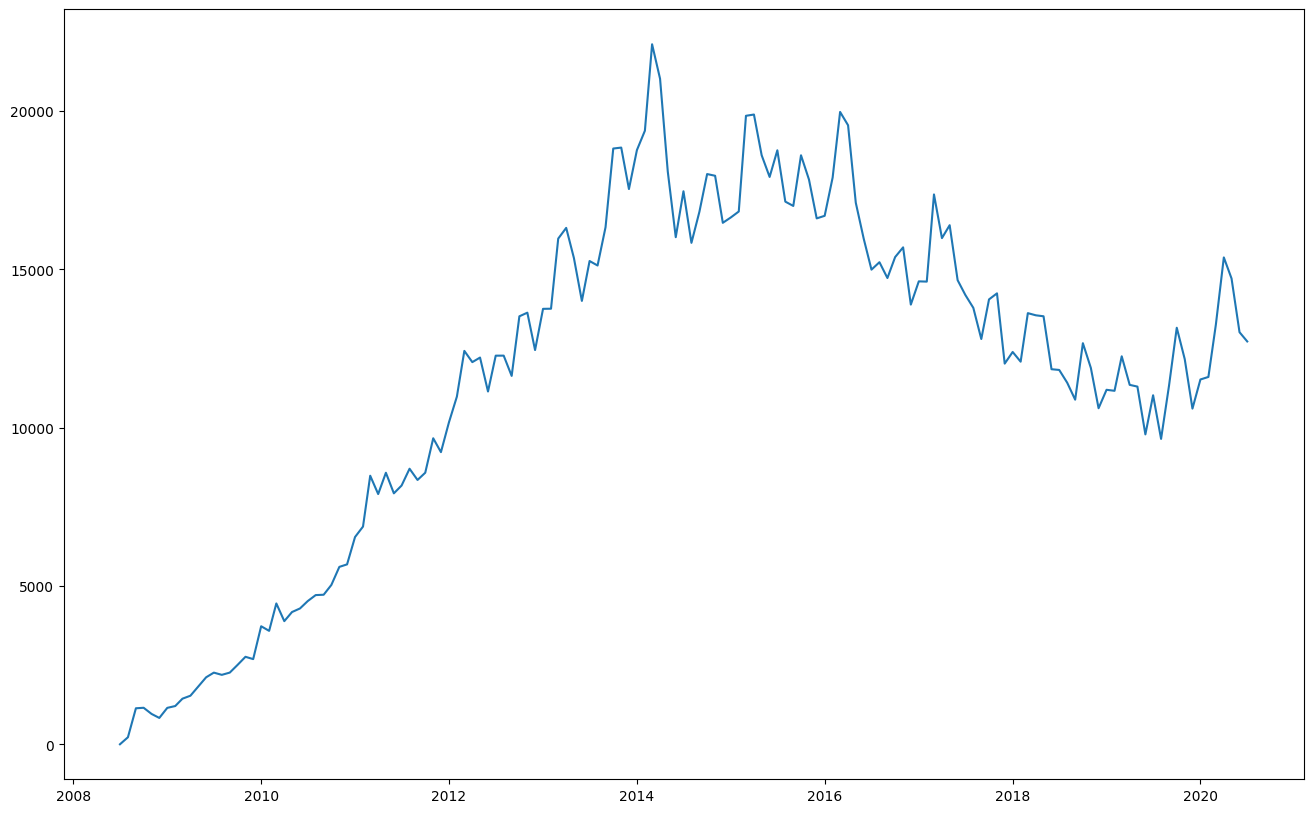

In [73]:
# To make our chart larger we can provide a width (16) and a height (10) as the figsize of the figure.

plt.figure(figsize=(16,10))
plt.plot(reshaped_data.index, reshaped_data.java)

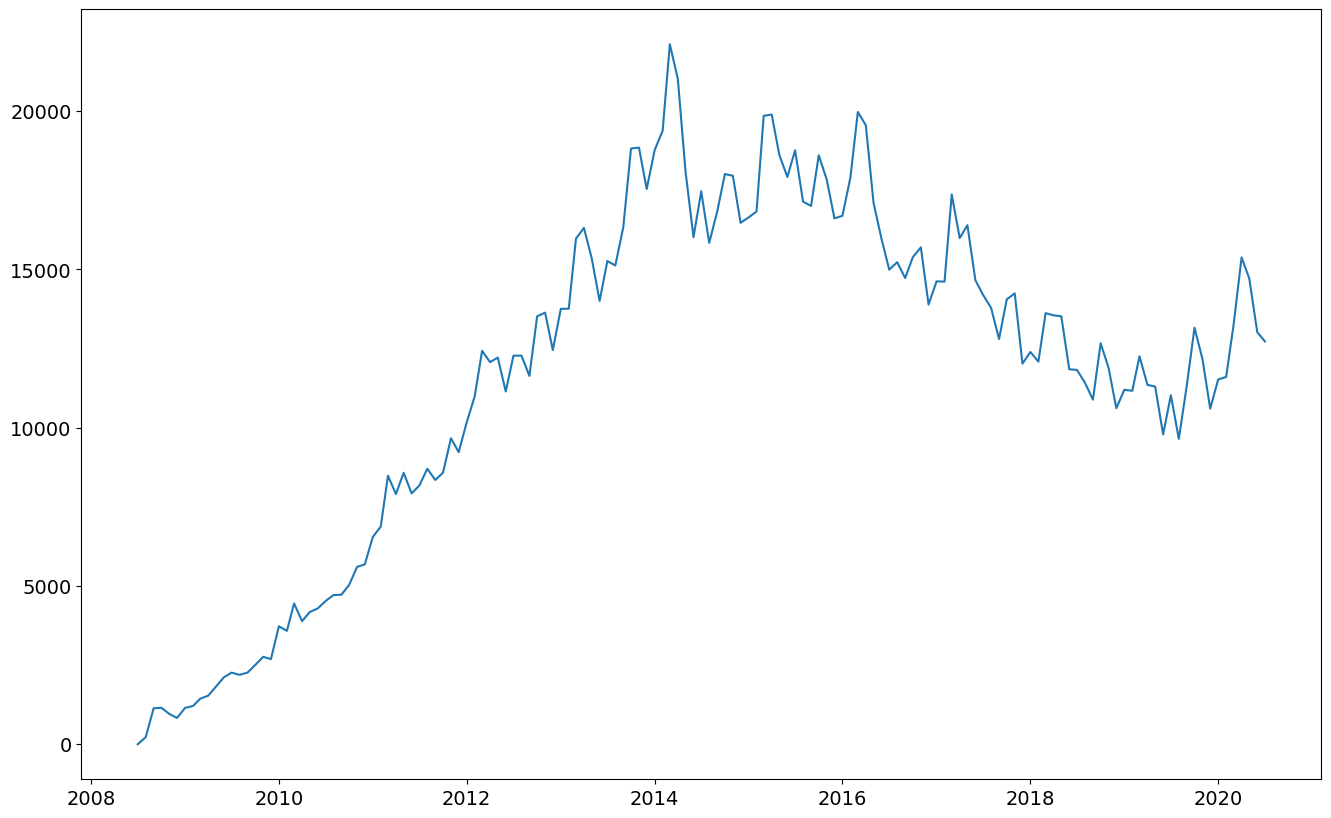

In [74]:
'''
This will make our chart easier to see.
But when we increase the size of the chart,
we should also increase the fontsize of the ticks on our axes so that they remain easy to read:
'''

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_data.index, reshaped_data.java)

In [75]:
'''
Now we can add labels.
Also, we're never going to get less than 0 posts, so let's set a lower limit of 0 for the y-axis with .ylim().


plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
'''

"\nNow we can add labels. \nAlso, we're never going to get less than 0 posts, so let's set a lower limit of 0 for the y-axis with .ylim().\n\n\nplt.xlabel('Date', fontsize=14)\nplt.ylabel('Number of Posts', fontsize=14)\nplt.ylim(0, 35000)\n"

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

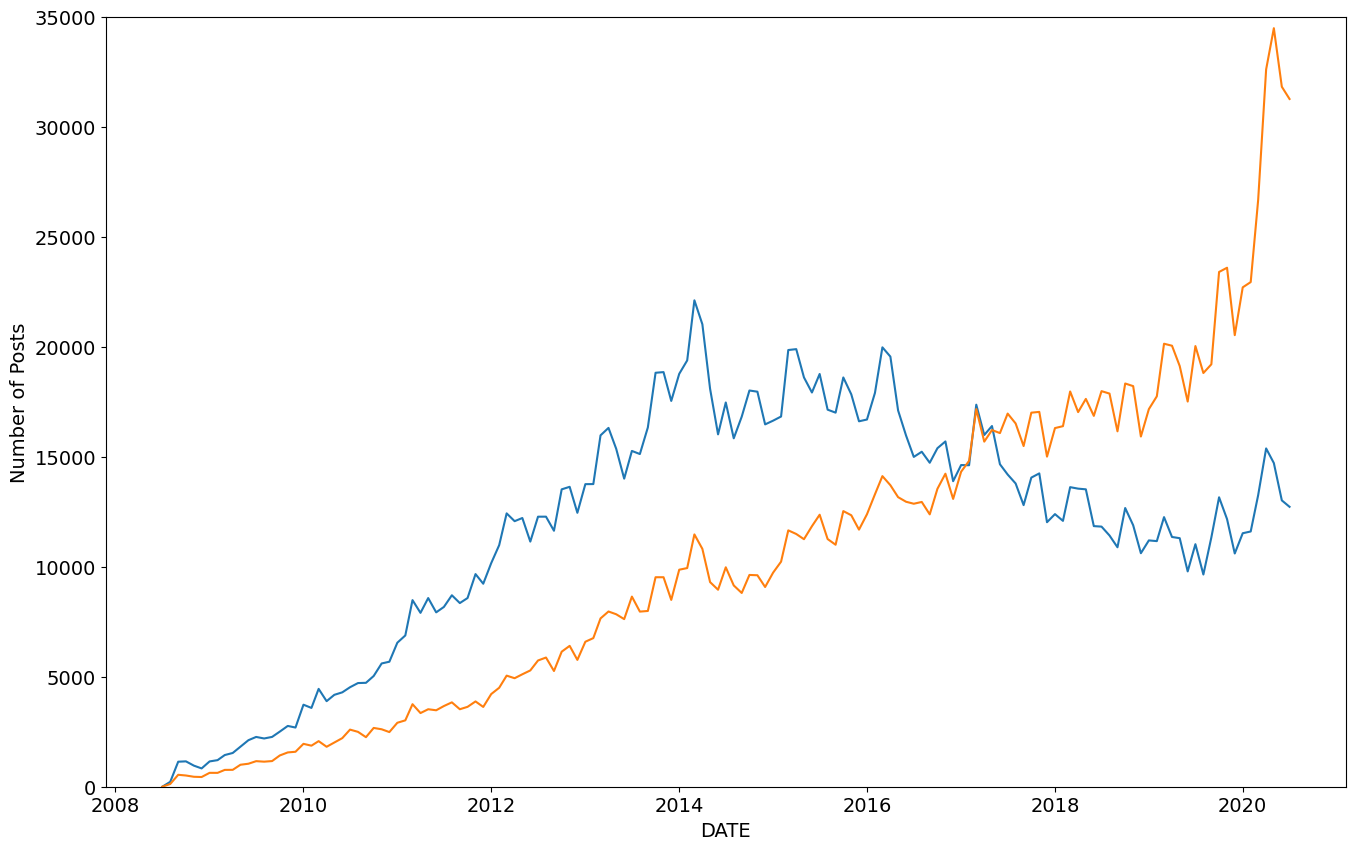

In [76]:
# Solution: Two Line Charts Next to Each Other

# The trick is simply calling the .plot() method twice. That's all there is to it! =)

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('DATE', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_data.index, reshaped_data.java)
plt.plot(reshaped_data.index, reshaped_data.python)

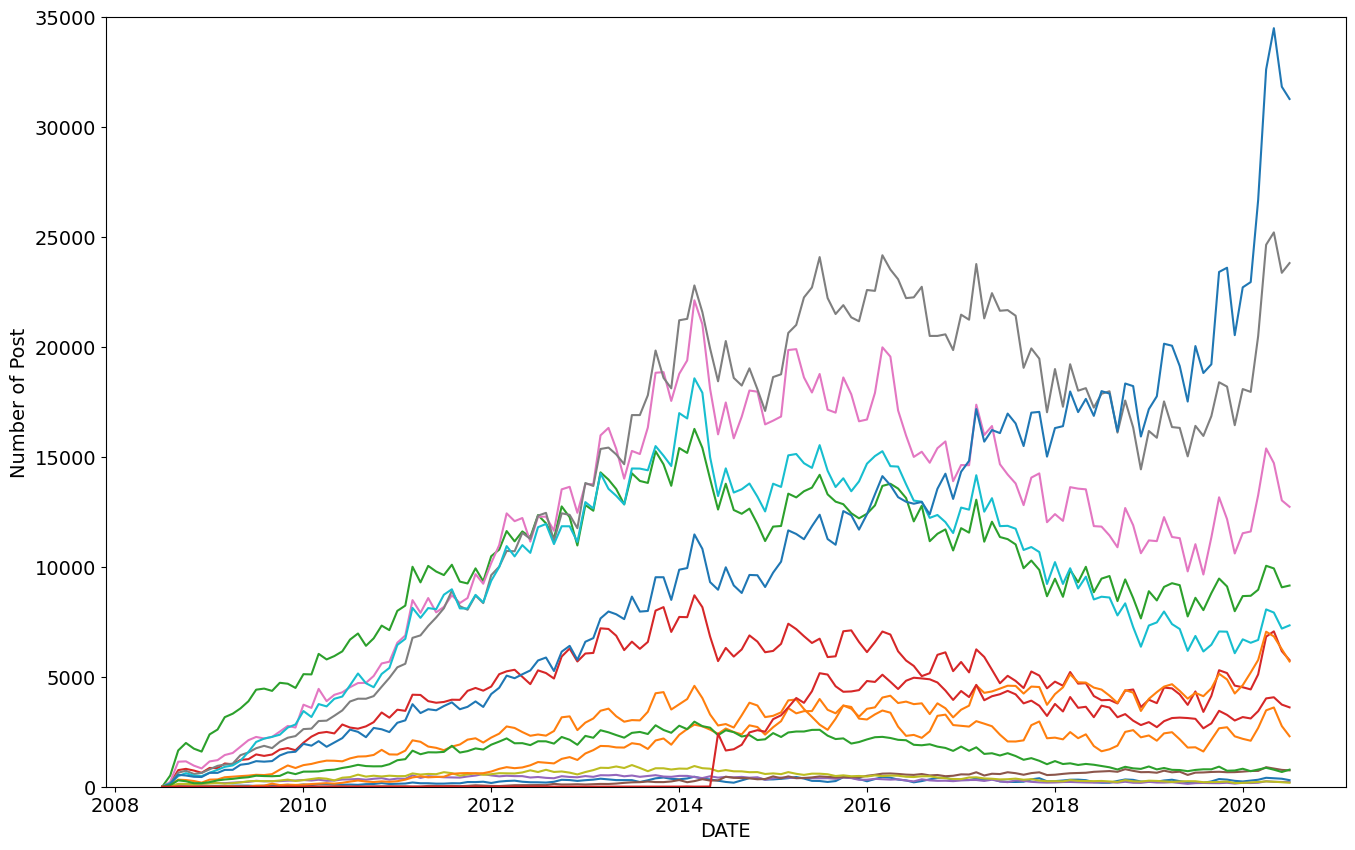

In [77]:
# But what if we wanted to plot all the programming languages on the same chart?
# We don't want to type out .plot() a million times, right? We can actually just use a for-loop:

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('DATE', fontsize=14)
plt.ylabel('Number of Post', fontsize=14)
plt.ylim(0, 35000)

# Plot all languages using for loop

for column in reshaped_data.columns:
  plt.plot(reshaped_data.index, reshaped_data[column])

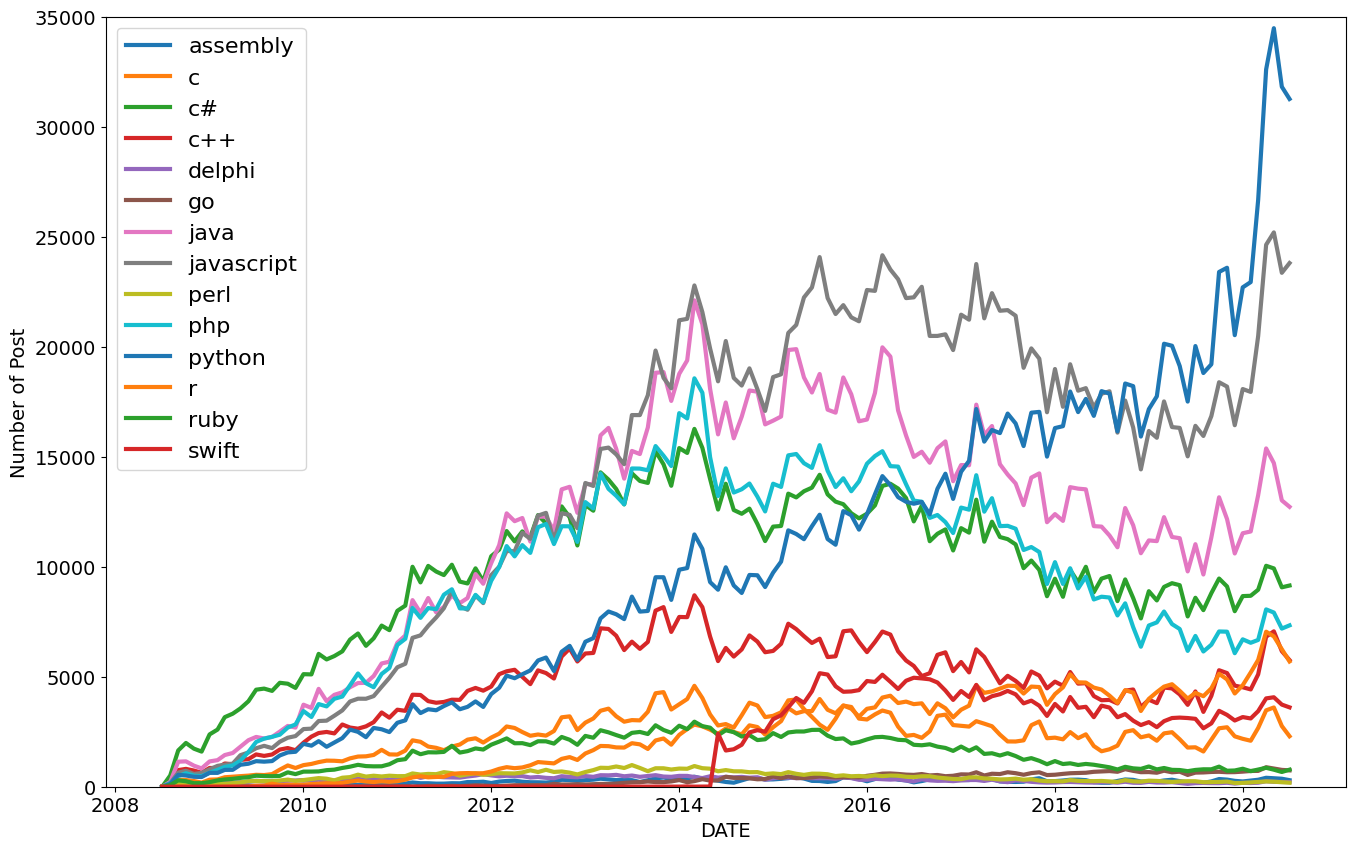

In [78]:
'''
But wait, which language is which? It's really hard to make out without a legend that tells us which colour corresponds to each language.
Let's modify the plotting code to add a label for each line based on the column name (and make the lines thicker at the same time using linewidth).
Then let's add a legend to our chart:
'''

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('DATE', fontsize=14)
plt.ylabel('Number of Post', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_data.columns:
  plt.plot(reshaped_data.index, reshaped_data[column], linewidth=3, label=reshaped_data[column].name)

plt.legend(fontsize=16)

<h1>No Loop:</h1>

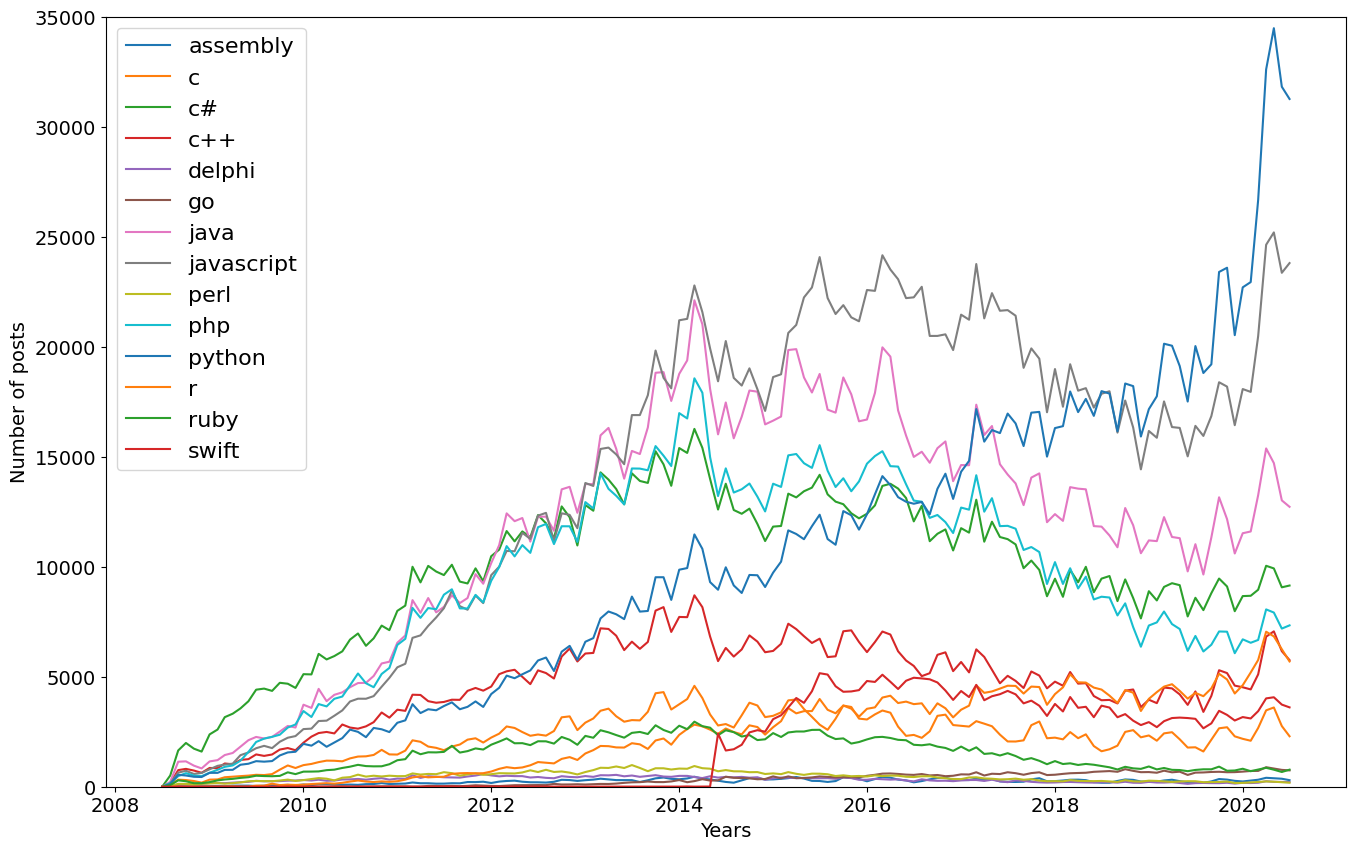

In [ ]:
# Bigger plot space
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add labels
plt.xlabel('Years', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(bottom=0, top=35000)

# Plot all
plt.plot(reshaped_data.index, reshaped_data)

# Add legends
plt.legend(reshaped_data.columns,fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

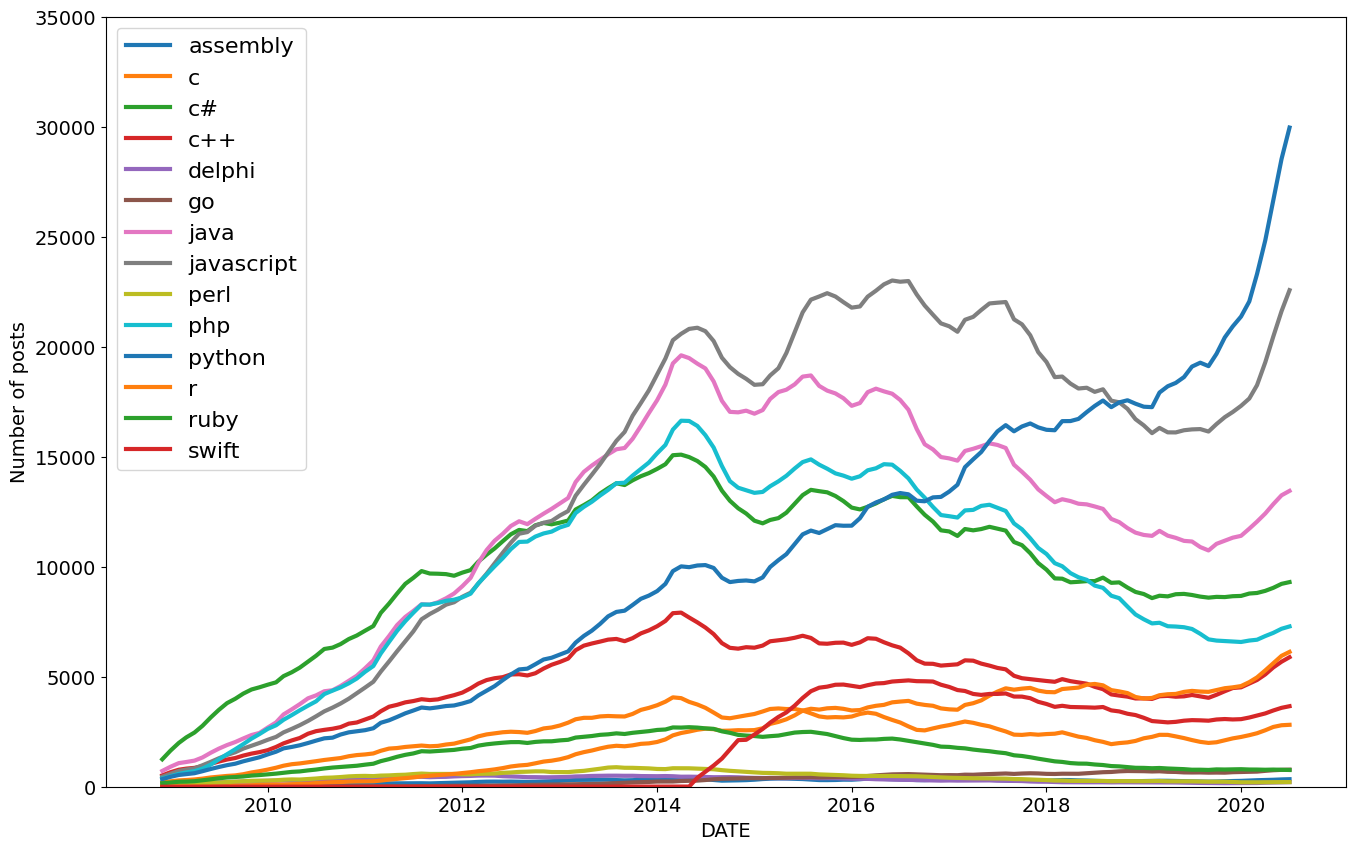

In [ ]:
'''
Looking at our chart we see that time-series data can be quite noisy, with a lot of up and down spikes.
This can sometimes make it difficult to see what's going on.

A useful technique to make a trend apparent is to smooth out the observations by taking an average.
By averaging say, 6 or 12 observations we can construct something called the rolling mean.
Essentially we calculate the average in a window of time and move it forward by one observation at a time.

Since this is such a common technique, Pandas actually two handy methods already built-in: rolling() and mean().
We can chain these two methods up to create a DataFrame made up of the averaged observations.
'''

# Widow is number of observations that are averaged
roll_df = reshaped_data.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('DATE', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0, 35000)

# Plot the roll_df instead
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)